<a href="https://colab.research.google.com/github/prasanndesai94/pvto-basketball-data-analytics/blob/main/pvto_vizs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mp
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/2022 PVTO Data Analytics Team/PVTOData.xlsx'

teamData = pd.read_excel(path,'TeamData')
playerData = pd.read_excel(path,'PlayerData')

In [ ]:
# Adding new measures in the data that can be visualised below 
teamData['%2pm'] = (teamData['Fgm']-teamData['3fgm'])/(teamData['Fga']-teamData['3fga'])
teamData['%3pm'] = teamData['3fgm']/teamData['3fga']

This scatterplot calculates the 2 point field percentage and 3 point field goal percentage for each team as a whole and then displays those results relative to the other teams. We see that the higher the team's data point is on the plot, the greater their 3 point field goal percentage and the more to the right the team's data point is on the plot, the greater their 2 point field goal percentage.

The teams in the bottom and top 10 percentile of each category are labeled in the scatterplot.

Those in the top 10 percentile (Chic. Comp B and Putnam B) both won their games which may have been due to their higher shooting percentages.

Those in the bottom 10 percentile, except Chicopee G, (Mahar G, Northampton G, Granby G) all lost their games which may have been due to thier lower shooting percentages. However, despite being in the bottom 10th percentile, Chicopee G actually won their game. This data point is clearly an outlier.

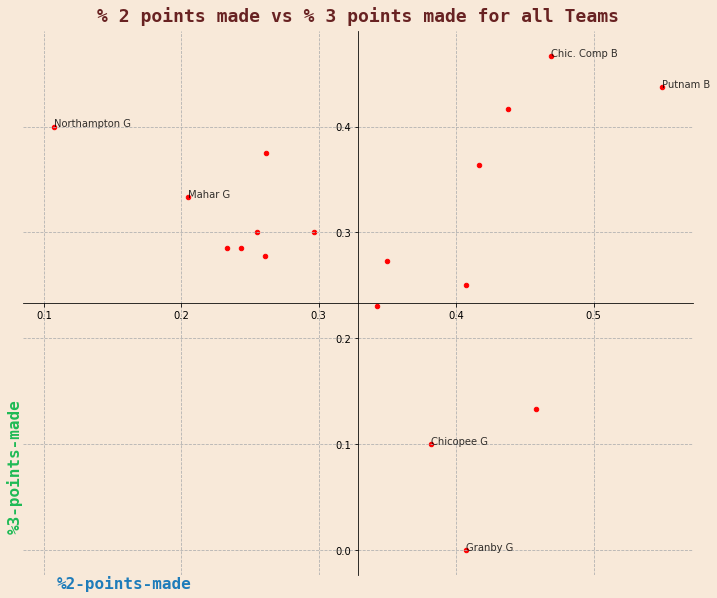

In [ ]:
# Scatterplot with basic parameter settings

plt.scatter(teamData['%2pm'],teamData['%3pm'], s=20, color='Red',zorder=1)
plt.rcParams["figure.figsize"] = (12,10)
plt.rcParams["figure.facecolor"] = "#f8e9d9"
# plt.rcParams["font.family"] = "serif"

plt.xlabel("%2-points-made",fontsize=16, color='#1e7cba', fontweight="bold", fontname='monospace')
plt.ylabel("%3-points-made",fontsize=16, color='#1eba55', fontweight="bold", fontname='monospace')
plt.title("% 2 points made vs % 3 points made for all Teams", color='#682222', fontsize=18, fontweight="bold", pad=10, fontname='monospace')

# fontname='fantasy'
#701d35

plt.grid(visible=True,linestyle='--')

# plt.xlim([0, 1])
# plt.ylim([0, 1])

# Re-positioning the origin in the center of the plot
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.set_facecolor("#f8e9d9")
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Re-positioning axis labels  
xcenter = np.average(teamData['%2pm'])
ycenter = np.average(teamData['%3pm'])
xmax = np.max(teamData['%2pm'])
ymax = np.max(teamData['%3pm'])
ax.xaxis.set_label_coords(0.15,0)
ax.yaxis.set_label_coords(0,0.20)

# Labelling each data point (higher than 90%ile and lower than 90%ile) in the plot with corresponding team-name
annotations=teamData['Name']
xHighOutlier = np.percentile(teamData['%2pm'],90)
xLowOutlier = np.percentile(teamData['%2pm'],10)

yHighOutlier = np.percentile(teamData['%3pm'],90)
yLowOutlier = np.percentile(teamData['%3pm'],10)

for i, label in enumerate(annotations):
  if (teamData['%2pm'][i] > xHighOutlier or teamData['%2pm'][i] < xLowOutlier) or ((teamData['%3pm'][i] > yHighOutlier or teamData['%3pm'][i] < yLowOutlier)): 
    plt.annotate(label, (teamData['%2pm'][i], teamData['%3pm'][i]), alpha=0.8)

# Adding a watermark with PVTO logo
# img = plt.imread("https://static.wixstatic.com/media/20df3c_80c98e6f59454949878bc459d553c952~mv2.png/v1/crop/x_0,y_110,w_1080,h_865/fill/w_330,h_264,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/Logo%20%231.png")
# plt.imshow(img,zorder=0,extent=[0, xmax*1.2, 0, ymax*1.1],alpha=0.1)


plt.show()

This series of bar charts calculates the 2 point field percentage, 3 point field goal percentage and overall field goal percentage respectively for each player on each team. It then displays those results in a bar chart relative to one's teammates. 

Users also have the option of only plotting certain bar charts (i.e. only 2 point fgp or only 3 and 2 point fgp) by passing the respective parameter into the plotting function ('2', '3', 'all')

We can compare these results with the overall team shooting percentages plotted above to see if which of those on a certain team may have had a higher or lower fgp than the overall team fgp.

We can also compare an individuals shooting percentage with themselves. For example, we can see if a certain player has a higher 3 point fgp or 2 point fgp and by how much etc.

In [ ]:
#function to plot a team's player's field goal percentages, either 2 point shots, 3 point shots, or all shots
def plot_team_fgp(team: str, type: str):
  #extract team
  playerDatagg = playerData[playerData['Team'] == team]
  #calculate fgp
  if type == 'all':
    ggfgp = (playerDatagg['Fgm'] + playerDatagg['3fgm'])/(playerDatagg['Fga'] + playerDatagg['3fga'])
    title = 'Field Goal Percentage for ' + team
    ylabel = 'Field Goal Percentage'
  elif type == '2':
    ggfgp = playerDatagg['Fgm']/playerDatagg['Fga']
    title = '2 Point Field Goal Percentage for ' + team
    ylabel = '2 Point Field Goal Percentage'
  elif type == '3':
    ggfgp = playerDatagg['3fgm']/playerDatagg['3fga']
    title = '3 Point Field Goal Percentage for ' + team
    ylabel = '3 Point Field Goal Percentage'
  else:
    print('Enter a valid field goal type')
    return None
  #players
  playerNames = playerDatagg['Name']
  
  #create bar chart, x=players and y=fgp
  plt.bar(playerNames, ggfgp)
  plt.title(title)
  plt.xlabel('Players')
  plt.ylabel(ylabel)
  plt.ylim(0, 1)
  plt.grid(True, alpha=0.5)
  major_ticks = np.arange(0, 1.1, 0.1)
  plt.yticks(major_ticks)
  plt.xticks(rotation=90, ha='center')
  plt.show()

In [ ]:
#function to plot all team's player's field goal percentages
def plot_all(team: str):
  teams = teamData['Name']
  if team == 'all':
    for t in teams:
      plot_team_fgp(t, '2')
      plot_team_fgp(t, '3')
      plot_team_fgp(t, 'all')
  else:
    for t in teams:
      if t == team:
        plot_team_fgp(t, '2')
        plot_team_fgp(t, '3')
        plot_team_fgp(t, 'all')

| Granby G | South Hadley G | Amherst G | Northampton G | Amherst B | Northampton B | Frontier G | Mahar G | Putnam B | Agawam B | Chicopee G | Chic. Comp G | Chic. Comp B | Chicopee B | Easthampton G | Hampshire G | Easthampton B | Hampshire B | Enter a specific team to plot data for or "all" for all teams (Case & Space Sensitive): Granby G


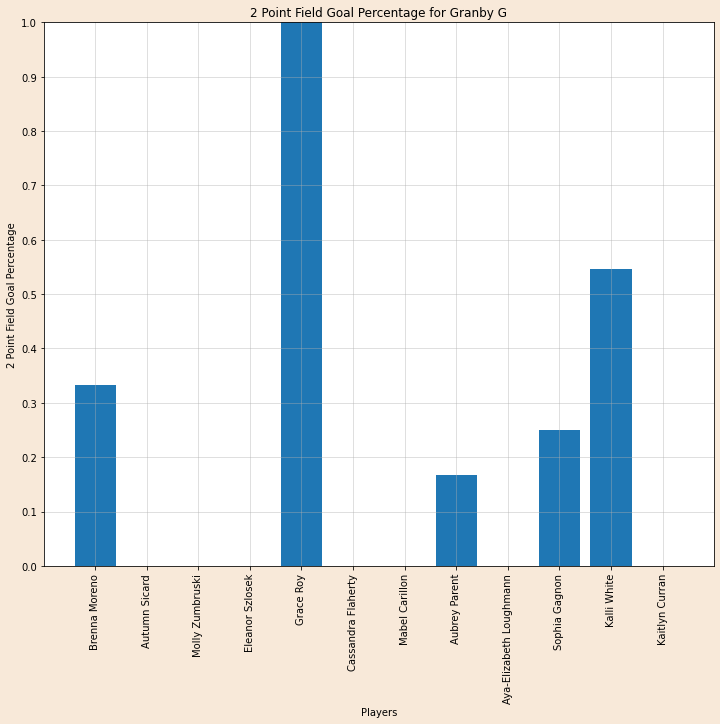

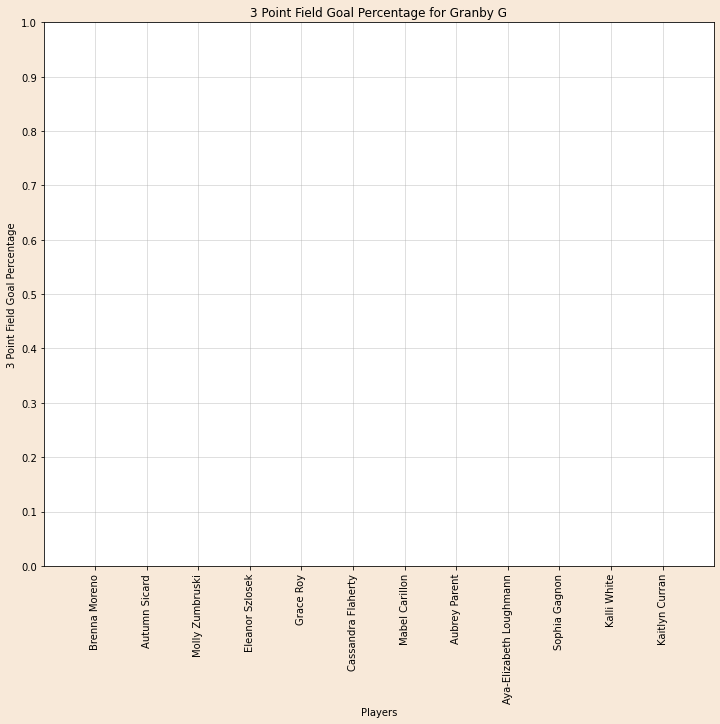

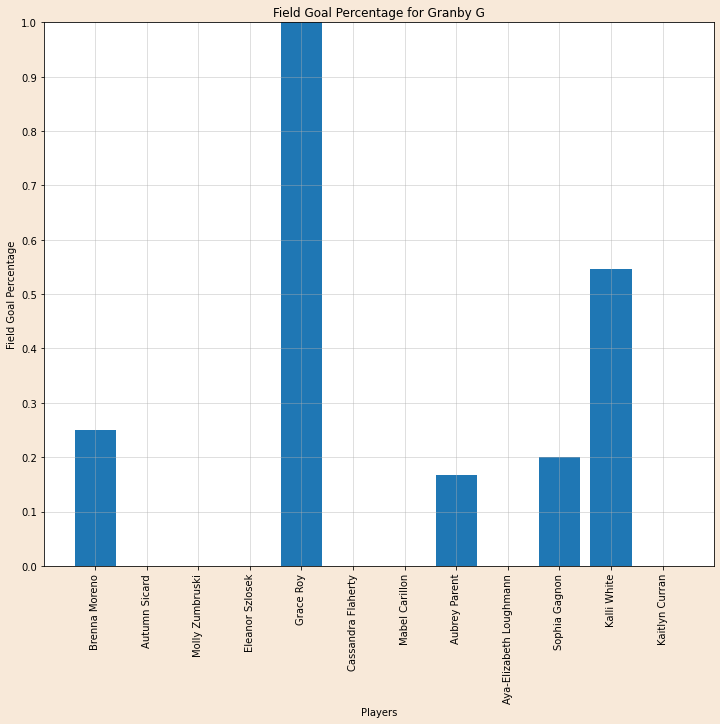

In [ ]:
teams = teamData['Name']
print('| ', end='')
for team in teams:
  print(team, end=' | ')

tteam = input('Enter a specific team to plot data for or \"all\" for all teams (Case & Space Sensitive): ')
plot_all(tteam)

This scatterplot calculates the effective field goal percentage and shot attempts for each team as a whole and then displays those results relative to the other teams. We see that the higher the team's data point is on the plot, the greater their effective field goal percentage and the more to the right the team's data point is on the plot, the greater their field goal atttempts.

The teams in the bottom and top 10 percentile of each category are labeled in the scatterplot.

Those in the top 10 percentile of efg% (Chic. Comp B and Putnam B) both won their games which may have been due to their higher shooting percentages while those in the bottom 10 percentile of efg% (Mahar G and Northampton G) both lost their games which may have been due to their lower shooting percentages

For the shot attempts, it is a more difficult to deduce a pattern as shot attempts alone do not have as much an impact as efg%. However, if there all several teams with the same efg%, then those with more field goal attempts will surely score more points. As a result, those in the top 10 percentile of field goal attempts (Chicopee G and Frontier G) both won their games which may have been due to the factors described. However, even Amherst G, which was in the bottom 10 percentile of field goal attempts won their game. This may be due to the fact that their opponent, Northampton G, was in the bottom 10 percentile of efg% more than the fact that their field goal attempts were low.

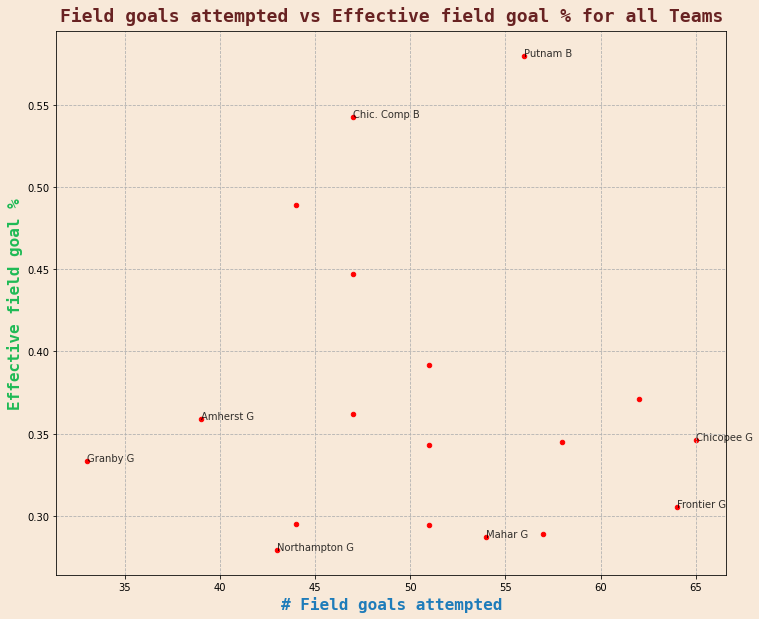

In [ ]:
x = teamData['Fga']
y = teamData['Efg%']
plt.scatter(x,y, s=20, color='Red',zorder=1)
plt.rcParams["figure.figsize"] = (12,10)
plt.rcParams["figure.facecolor"] = "#f8e9d9"
# plt.rcParams["font.family"] = "serif"

plt.xlabel("# Field goals attempted",fontsize=16, color='#1e7cba', fontweight="bold", fontname='monospace')
plt.ylabel("Effective field goal %",fontsize=16, color='#1eba55', fontweight="bold", fontname='monospace')
plt.title("Field goals attempted vs Effective field goal % for all Teams", color='#682222', fontsize=18, fontweight="bold", pad=10, fontname='monospace')


plt.grid(visible=True,linestyle='--')

# Re-positioning the origin in the center of the plot
ax = plt.gca()
ax.set_facecolor("#f8e9d9")
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# Labelling each data point (higher than 90%ile and lower than 90%ile) in the plot with corresponding team-name
annotations = teamData['Name']
xHighOutlier = np.percentile(x,90)
xLowOutlier = np.percentile(x,10)

yHighOutlier = np.percentile(y,90)
yLowOutlier = np.percentile(y,10)

for i, label in enumerate(annotations):
  if (x[i] > xHighOutlier or x[i] < xLowOutlier) or ((y[i] > yHighOutlier or y[i] < yLowOutlier)): 
    plt.annotate(label, (x[i], y[i]), alpha=0.8)


# Adding a watermark with PVTO logo
xcenter = np.average(x)
ycenter = np.average(y)
xmax = np.max(x)
ymax = np.max(y)

img = plt.imread("https://static.wixstatic.com/media/20df3c_80c98e6f59454949878bc459d553c952~mv2.png/v1/crop/x_0,y_110,w_1080,h_865/fill/w_330,h_264,al_c,q_85,usm_0.66_1.00_0.01,enc_auto/Logo%20%231.png")
# plt.imshow(img,zorder=0,extent=[0, xmax*1.2, 0, ymax*1.1],alpha=0.1)


plt.show()


The following methods calculate and display the assist to turnover ratio for all players in the PVTO event that played at least a certain number of minutes. The amount of minutes used is user specified.

The taller the bar for a specific player, the greater their assist to turnover ratio and the shorter the bar, the smaller their assist to turnover ratio. A player's assist to turnover ratio can serve as a preliminary indicator of ball control. A player who creates more assists (passes that make a point) and fewer turnovers (the number of times they lose the ball) has a greater ratio and thus may have better ball control wheras a player who has less assists and more turnovers has a smaller ratio and thus may have worse ball control.

However, a player who scores a lot may have a low number of assists (points scored do not affect the ratio). They would also have a higher number of turnovers (they may also take the ball closer to the net). This player would have a lower ratio than a player who focuses on assists. In turn, this ratio can not be used solely as a measure of a player's ball control or thier abilities as a basketball player.

In [ ]:
#function to plot player's assist to turnover ratio
def plot_ratio(mins: str):
  #extract players with equal or more playing time
  playerdata = playerData[playerData['Min'] >= float(mins)]
  #calculate ast/to ratio
  astto = playerdata['Ast']/playerdata['To']
  #players
  playerNames = playerdata['Name']

  #create bar chart, x=players and y=ratio
  plt.bar(playerNames, astto)
  plt.title('Assist to Turnover Ratio for players with ' + mins + ' minutes or more of playing time')
  plt.xlabel('Players')
  plt.ylabel('Assist to Turnover Ratio')
  plt.ylim(0, 6)
  plt.grid(True, alpha=0.5)
  major_ticks = np.arange(0, 7, 1)
  plt.yticks(major_ticks)
  plt.xticks(rotation=90, ha='center')
  plt.show()

Plot assist to turnover ratio for all players who have played at least how many minutes? 25


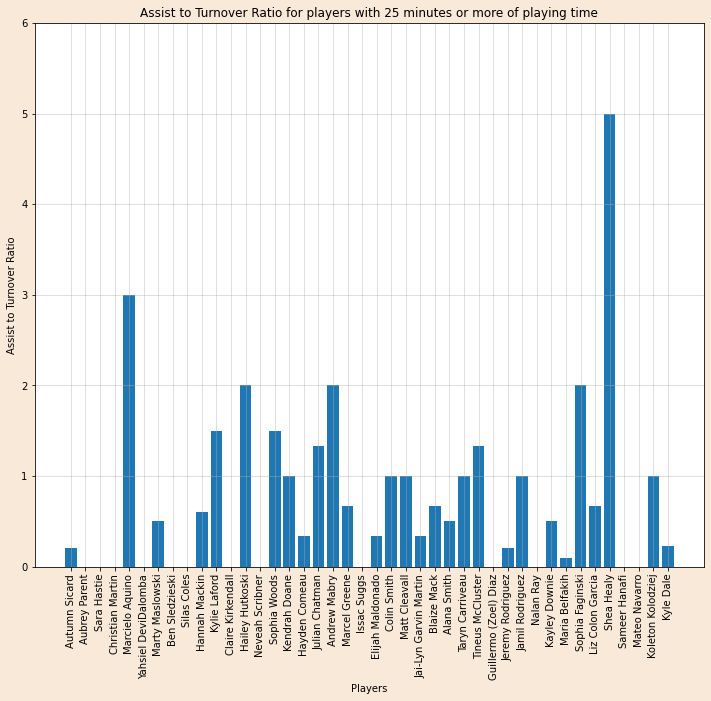

In [ ]:
time = input('Plot assist to turnover ratio for all players who have played at least how many minutes? ').strip()
plot_ratio(time)

This scatterplot calculates the Offensive rebound percentage and Defensive rebound percentage for each team as a whole and then displays those results relative to the other teams. 

The teams in the bottom and top 10 percentile of each category are labeled in the scatterplot.

The size and color of the bubbles in the plot are determined by the total number of points scored by the team. 

From the plot, we can infer that, teams with higher DREB% are successful at winning possession from a missed basket and then eventually scoring points on the other end. As a result, we can see that the top 3 scorers in the competition namely Easthampton B, Putnam B and Chicopee G also have very high DREB%.

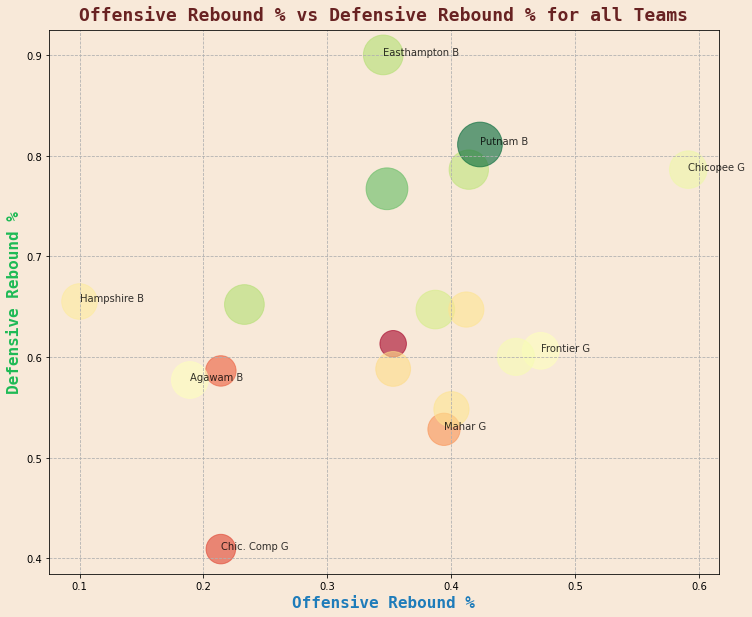

In [ ]:
x = teamData['RebO%']
y = teamData['RebD%']
points = teamData['Points']
maxPoints = np.max(points)
# c_points = sorted(points)

plt.scatter(x,y, s = (points/maxPoints)*2000, zorder=1, alpha=0.6, c = points, cmap="RdYlGn")
plt.rcParams["figure.figsize"] = (12,10)
plt.rcParams["figure.facecolor"] = "#f8e9d9"

plt.xlabel("Offensive Rebound %",fontsize=16, color='#1e7cba', fontweight="bold", fontname='monospace')
plt.ylabel("Defensive Rebound %",fontsize=16, color='#1eba55', fontweight="bold", fontname='monospace')
plt.title("Offensive Rebound % vs Defensive Rebound % for all Teams", color='#682222', fontsize=18, fontweight="bold", pad=10, fontname='monospace')
plt.grid(visible=True,linestyle='--')

# Re-positioning the origin in the center of the plot
ax = plt.gca()
ax.set_facecolor("#f8e9d9")
# ax.spines['left'].set_position('center')
# ax.spines['bottom'].set_position('center')
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')

# # Re-positioning axis labels  
# xcenter = np.average(x)
# ycenter = np.average(y)
# xmax = np.max(x)
# ymax = np.max(y)
# ax.xaxis.set_label_coords(0.15,0)
# ax.yaxis.set_label_coords(0,0.20)


# Labelling each data point (higher than 90%ile and lower than 90%ile) in the plot with corresponding team-name
annotations = teamData['Name']
xHighOutlier = np.percentile(x,90)
xLowOutlier = np.percentile(x,10)

yHighOutlier = np.percentile(y,90)
yLowOutlier = np.percentile(y,10)

for i, label in enumerate(annotations):
  if (x[i] > xHighOutlier or x[i] < xLowOutlier) or ((y[i] > yHighOutlier or y[i] < yLowOutlier)): 
    plt.annotate(label, (x[i], y[i]), alpha=0.8)

plt.show()